<a href="https://colab.research.google.com/github/elikaaghaei/Rahnema_college/blob/main/%22ML%20notebooks%22/MNIST_TF_Keras_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Part

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Load MNIST Dataset and convert to Float

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train, x_test = x_train/255.0 , x_test/255.0

5


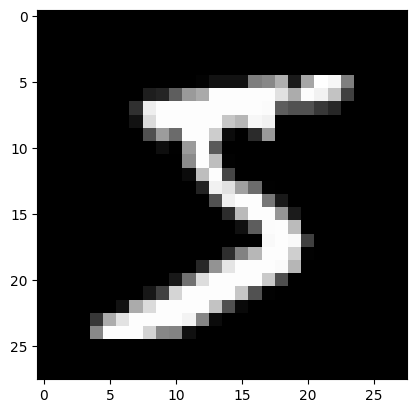

In [9]:
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

### Create Model using Keras

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary());

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Train and Evaluate the mode

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8586 - loss: 0.4804
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9536 - loss: 0.1598
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9671 - loss: 0.1104
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9731 - loss: 0.0877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9762 - loss: 0.0768


In [16]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9761 - loss: 0.0795


[0.07949995249509811, 0.9761000275611877]

7


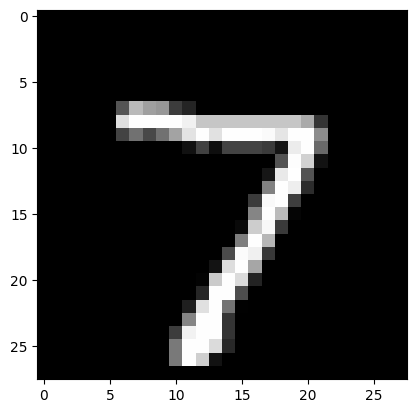

In [18]:
print("true label: %d" % (y_test[0]))
plt.imshow(x_test[0], cmap='gray')



In [21]:
predictions = model.predict(np.reshape(x_test[0],[-1,28,28]))
print("predicted label: %d" % (np.argmax(predictions)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
predicted label: 7


In [22]:
print((predictions))

[[1.0461434e-08 6.2430670e-09 6.8002710e-06 8.9048684e-05 4.4275757e-11
  3.9324286e-07 1.5308662e-13 9.9990273e-01 2.2325804e-07 8.2332849e-07]]
